In [111]:
import pandas as pd

data = pd.read_csv('../../data/Raw-GPS-data-Kandy-Buses/MAIN/OUTPUT/merged_segements_10T.csv')

data.head(2)

,segment_starting_time,segment_ending_time,trip_id,deviceid,date,start_terminal,end_terminal,direction,day_of_week,hour_of_day,...,max_speed,speed_variation,elevation_p,elevation_n,ele_X_speed_acc_p,ele_X_speed_acc_n,average_acceleration,average_deacceleration,std_acc_dacc,stop_count
0,2021-10-16 07:08:31,2021-10-16 07:18:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,35.6372,117.835732,0.034371,-0.048169,5.618765,15.764998,0.603900,-1.230988,1.021837,4
1,2021-10-16 07:18:31,2021-10-16 07:28:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,32.9374,56.681460,0.039847,-0.039004,10.944814,8.906415,0.442037,-0.663055,0.759768,4


In [52]:
column_names = data.columns.tolist()

# Print column names
print("Column Names:", column_names)

Column Names: ['segment_starting_time', 'segment_ending_time', 'trip_id', 'deviceid', 'date', 'start_terminal', 'end_terminal', 'direction', 'day_of_week', 'hour_of_day', 'segment_id', 'average_speed', 'max_speed', 'speed_variation', 'elevation_p', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc', 'stop_count']


In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def elbow_method(result,clustering_features):
  # eg :- clustering_features = ['speed_mean', 'speed_variance']
  X = result[clustering_features]

  # Standardize the data (important for K-Means)
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Initialize lists to store inertia values for different k
  inertia_values = []

  # Determine a range of k values to test (e.g., from 1 to 10 clusters)
  k_values = range(1, 11)

  # Calculate inertia for each k value
  for k in k_values:
      kmeans = KMeans(n_clusters=k, random_state=0)
      kmeans.fit(X_scaled)
      inertia_values.append(kmeans.inertia_)

  # Plot the elbow graph
  plt.plot(k_values, inertia_values, marker='o', linestyle='-')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method for Optimal k')
  plt.grid(True)
  plt.show()

/Users/gimhanranasinghe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gimhanranasinghe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gimhanranasinghe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gimhanranasinghe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

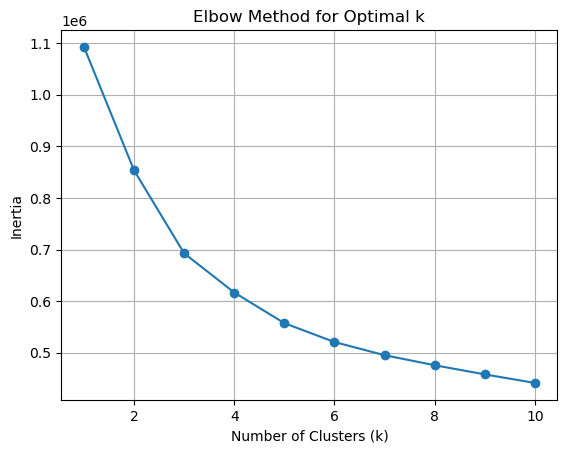

In [112]:
data = data.dropna(subset=['elevation_p', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc', 'stop_count', 'average_speed', 'max_speed', 'speed_variation'])
elbow_method(data,['elevation_p', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc', 'stop_count', 'average_speed', 'max_speed', 'speed_variation'])

In [56]:
data.head()

,segment_starting_time,segment_ending_time,trip_id,deviceid,date,start_terminal,end_terminal,direction,day_of_week,hour_of_day,...,max_speed,speed_variation,elevation_p,elevation_n,ele_X_speed_acc_p,ele_X_speed_acc_n,average_acceleration,average_deacceleration,std_acc_dacc,stop_count
0,2021-10-16 07:08:31,2021-10-16 07:18:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,35.6372,117.835732,0.034371,-0.048169,5.618765,15.764998,0.603900,-1.230988,1.021837,4
1,2021-10-16 07:18:31,2021-10-16 07:28:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,32.9374,56.681460,0.039847,-0.039004,10.944814,8.906415,0.442037,-0.663055,0.759768,4
2,2021-10-16 07:28:31,2021-10-16 07:38:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,21.0583,52.184052,0.049139,-0.050695,6.122113,10.405097,0.434465,-0.626983,0.648791,7
3,2021-10-16 07:38:31,2021-10-16 07:48:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,24.8380,47.224719,0.040474,-0.045044,13.899388,5.383102,0.335428,-0.522203,0.525860,2
4,2021-10-16 07:48:31,2021-10-16 07:58:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,17.8186,13.377603,0.032281,-0.043973,3.570260,5.446139,0.298263,-0.326129,0.405536,0


K means

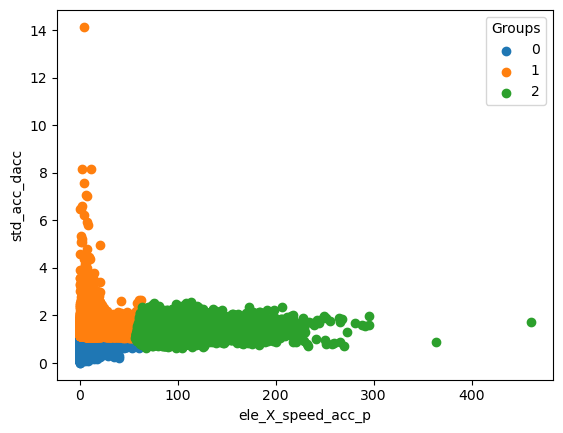

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Select the features for clustering
X = data[['ele_X_speed_acc_p', 'std_acc_dacc']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = X

# Perform K-Means clustering
k = 3  # You can choose the number of clusters (k) as needed
kmeans = KMeans(n_init=10,n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Add 'deviceid' back to the clustered data
# clustered_data = pd.merge(df_all, result[['deviceid', 'cluster']], on='deviceid')

# Create a scatter plot with annotations
groups = data['cluster'].unique()

for group in groups:
    group_data = data[data['cluster'] == group]
    plt.scatter(group_data['ele_X_speed_acc_p'], group_data['std_acc_dacc'], label=group)

# Annotate data points with 'deviceid'
    # for index, row in group_data.iterrows():
    #     plt.annotate(row['deviceid'], (row['ele_X_speed_acc_p'], row['ele_X_speed_acc_n']), fontsize=5)

plt.xlabel('ele_X_speed_acc_p')
plt.ylabel('std_acc_dacc')
plt.legend(title='Groups')

# Show the plot
plt.show()

PCA

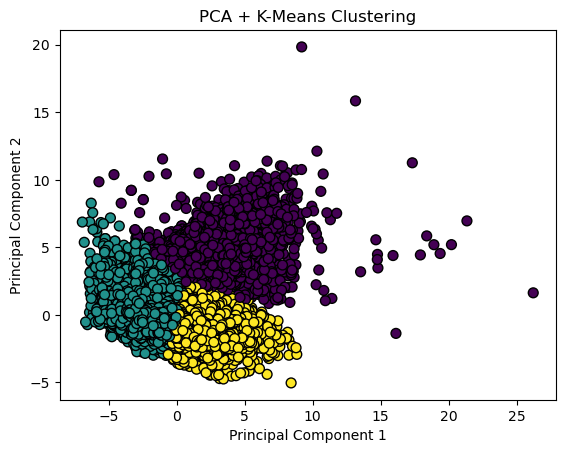

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = data.dropna(subset=['elevation_p', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc', 'stop_count', 'average_speed', 'max_speed', 'speed_variation'])

# Select the features for clustering
X = data[['elevation_p', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc', 'stop_count', 'average_speed', 'max_speed', 'speed_variation']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Perform K-Means clustering
k = 3  # You can choose the number of clusters (k) as needed
kmeans = KMeans(n_init=10,n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(principal_components)

# Fit K-Means on the principal components
principal_df['cluster'] = kmeans.fit_predict(principal_components)

data['PC1'] = principal_df['PC1']
data['PC2'] = principal_df['PC2']

# Plot the clusters in the reduced space
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['cluster'], cmap='viridis', marker='o', s=50, edgecolors='k')
plt.title('PCA + K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Assuming 'data' is your DataFrame
data.to_csv('kmeans_clusters.csv', index=False)
# Add 'deviceid' back to the clustered data
# clustered_data = pd.merge(df_all, result[['deviceid', 'cluster']], on='deviceid')

# Create a scatter plot with annotations
# groups = data['cluster'].unique()

# for group in groups:
#     group_data = data[data['cluster'] == group]
#     plt.scatter(group_data['ele_X_speed_acc_p'], group_data['std_acc_dacc'], label=group)

# # Annotate data points with 'deviceid'
#     # for index, row in group_data.iterrows():
#     #     plt.annotate(row['deviceid'], (row['ele_X_speed_acc_p'], row['ele_X_speed_acc_n']), fontsize=5)

# plt.xlabel('ele_X_speed_acc_p')
# plt.ylabel('std_acc_dacc')
# plt.legend(title='Groups')

# # Show the plot
# plt.show()

In [18]:
cluster_0 = data[data["cluster"]==2]
cluster_0

,segment_starting_time,segment_ending_time,trip_id,deviceid,date,start_terminal,end_terminal,direction,day_of_week,hour_of_day,...,elevation_n,ele_X_speed_acc_p,ele_X_speed_acc_n,average_acceleration,average_deacceleration,std_acc_dacc,stop_count,cluster,PC1,PC2
0,2021-10-16 07:08:31,2021-10-16 07:18:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,-0.048169,5.618765,15.764998,0.603900,-1.230988,1.021837,4,2,3.689867,-2.952610
1,2021-10-16 07:18:31,2021-10-16 07:28:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,-0.039004,10.944814,8.906415,0.442037,-0.663055,0.759768,4,2,0.640129,-1.664180
9,2021-10-16 08:43:04,2021-10-16 08:53:04,2.0,116,2021-10-16,BT01,BT02,1,5,8,...,-0.028585,12.076915,5.376656,0.509347,-0.726381,0.802921,6,2,0.022367,-1.188911
22,2021-10-16 13:10:45,2021-10-16 13:20:45,4.0,116,2021-10-16,BT01,BT02,1,5,12,...,-0.032051,12.405068,3.771461,0.523016,-0.792876,0.766072,6,2,0.035236,-0.980281
23,2021-10-16 14:14:36,2021-10-16 14:24:36,5.0,116,2021-10-16,BT02,BT01,2,5,14,...,-0.050555,1.736247,11.189772,0.639767,-0.609552,0.656160,4,2,1.553282,-2.423467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103205,2022-11-01 13:10:36,2022-11-01 13:20:36,17194.0,1377,2022-11-01,BT02,BT01,2,1,13,...,-0.053507,2.459321,12.406693,0.618702,-0.840528,0.761414,7,2,NaN,NaN
103206,2022-11-01 13:20:36,2022-11-01 13:30:36,17194.0,1377,2022-11-01,BT02,BT01,2,1,13,...,-0.031638,9.461470,5.934043,0.557294,-1.004339,0.746320,7,2,NaN,NaN
103215,2022-11-01 15:09:51,2022-11-01 15:19:51,17195.0,1377,2022-11-01,BT01,BT02,1,1,14,...,-0.039912,9.281875,11.275804,0.494730,-0.840790,0.924022,3,2,NaN,NaN
103216,2022-11-01 15:19:51,2022-11-01 15:29:51,17195.0,1377,2022-11-01,BT01,BT02,1,1,14,...,-0.031017,12.777538,3.580043,0.457464,-0.963333,0.856304,2,2,NaN,NaN


In [7]:
print(len(data))

99326


/Users/gimhanranasinghe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


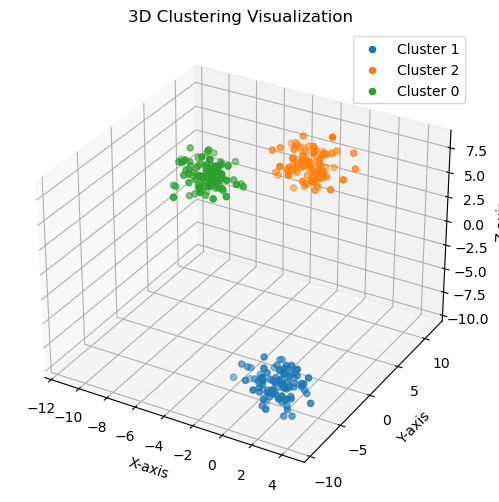

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic 3D data with three clusters
X, _ = make_blobs(n_samples=300, n_features=3, centers=3, random_state=42, cluster_std=1.0)
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Visualize the clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]
    ax.scatter(cluster_data['X'], cluster_data['Y'], cluster_data['Z'], label=f'Cluster {cluster_label}')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Clustering Visualization')
ax.legend()

plt.show()


3D Clustering Visualization

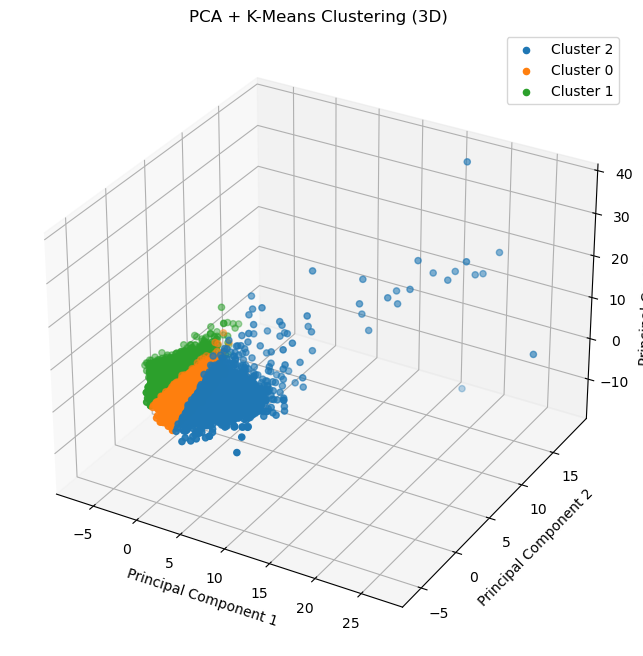

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# # Sample data (replace this with your actual data loading)
# data = pd.DataFrame(np.random.rand(100, 11), columns=['elevation_p', 'elevation_n', 'ele_X_speed_acc_p',
#                                                        'ele_X_speed_acc_n', 'average_acceleration',
#                                                        'average_deacceleration', 'std_acc_dacc', 'stop_count',
#                                                        'average_speed', 'max_speed', 'speed_variation'])

# Drop rows with NaN values
data = data.dropna(subset=['elevation_p', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n',
                            'average_acceleration', 'average_deacceleration', 'std_acc_dacc',
                            'stop_count', 'average_speed', 'max_speed', 'speed_variation'])

# Select the features for clustering
X = data[[
                            'average_acceleration', 'average_deacceleration', 'std_acc_dacc',
                             'average_speed', 'max_speed', 'speed_variation']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=3)  # Set the number of components as needed
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Perform K-Means clustering
k = 3  # You can choose the number of clusters (k) as needed
kmeans = KMeans(n_init=10, n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(principal_components)

# Fit K-Means on the principal components
principal_df['cluster'] = kmeans.fit_predict(principal_components)

# Plot the clusters in the 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in principal_df['cluster'].unique():
    cluster_data = principal_df[principal_df['cluster'] == cluster_label]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               label=f'Cluster {cluster_label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA + K-Means Clustering (3D)')
ax.legend()

plt.show()


In [30]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'column_to_smooth' is the column you want to smooth
# You can adjust the number of bins based on your specific needs

# Create a DataFrame (replace this with your actual data)
data = {'column_to_smooth': [70,40,60, 15, 35, 22,   55, 10]}
df = pd.DataFrame(data)

# Define bin edges
bin_edges = [0, 20, 40, 60, 80]

# Create bin labels
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4']

# Use cut to bin the data
df['bin_column'] = pd.cut(df['column_to_smooth'], bins=bin_edges, labels=bin_labels)

# Calculate bin means
bin_means = df.groupby('bin_column')['column_to_smooth'].mean()

# Replace values with bin means
df['smoothed_column'] = df['bin_column'].map(bin_means)

# Display the resulting DataFrame
print(df)


   column_to_smooth bin_column smoothed_column
0                70      Bin 4       70.000000
1                40      Bin 2       32.333333
2                60      Bin 3       57.500000
3                15      Bin 1       12.500000
4                35      Bin 2       32.333333
5                22      Bin 2       32.333333
6                55      Bin 3       57.500000
7                10      Bin 1       12.500000


In [114]:
def bim_mean_smoothing(df,columns):

    for index in range(len(columns)):
        data = df[columns[index]]
        # Specify the number of bins
        num_bins = round(len(data)/10000)

        # Dynamically calculate bin edges based on quantiles
        bin_edges = pd.qcut(data, q=num_bins, retbins=True)[1]
        bin_edges[0] = bin_edges[0]-1

        bin_labels = [f'Bin {i}' for i in range(1, num_bins + 1)]

        # Use cut to bin the data
        bin_name = "bin_name_"+columns[index]
        df[bin_name] = pd.cut(data, bins=bin_edges, labels=bin_labels)

        # Calculate bin means
        bin_means = df.groupby(bin_name)[columns[index]].mean()

        # Replace values with bin means
        new_col = 'bin_'+columns[index]
        df[new_col] = df[bin_name].map(bin_means)
        df = df.drop(bin_name, axis=1)

    return df


In [115]:
smoothed_data = bim_mean_smoothing(data,['elevation_p', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc', 'stop_count', 'average_speed', 'max_speed', 'speed_variation'])
smoothed_data.head()

,segment_starting_time,segment_ending_time,trip_id,deviceid,date,start_terminal,end_terminal,direction,day_of_week,hour_of_day,...,bin_elevation_n,bin_ele_X_speed_acc_p,bin_ele_X_speed_acc_n,bin_average_acceleration,bin_average_deacceleration,bin_std_acc_dacc,bin_stop_count,bin_average_speed,bin_max_speed,bin_speed_variation
0,2021-10-16 07:08:31,2021-10-16 07:18:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,-0.047069,5.972339,58.939851,0.605650,-1.226799,0.976251,3.565765,15.640488,31.441564,79.762104
1,2021-10-16 07:18:31,2021-10-16 07:28:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,-0.040137,10.844511,9.532382,0.456872,-0.655793,0.717962,3.565765,12.824090,31.441564,54.612842
2,2021-10-16 07:28:31,2021-10-16 07:38:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,-0.049817,5.972339,11.192944,0.416092,-0.655793,0.717962,7.000000,12.824090,21.060607,54.612842
3,2021-10-16 07:38:31,2021-10-16 07:48:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,-0.043985,12.868492,4.994996,0.323229,-0.501564,0.557629,1.284850,13.679889,25.050600,48.706452
4,2021-10-16 07:48:31,2021-10-16 07:58:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,-0.043985,3.190391,4.994996,0.323229,-0.307419,0.348197,1.284850,11.640408,18.390520,12.694255


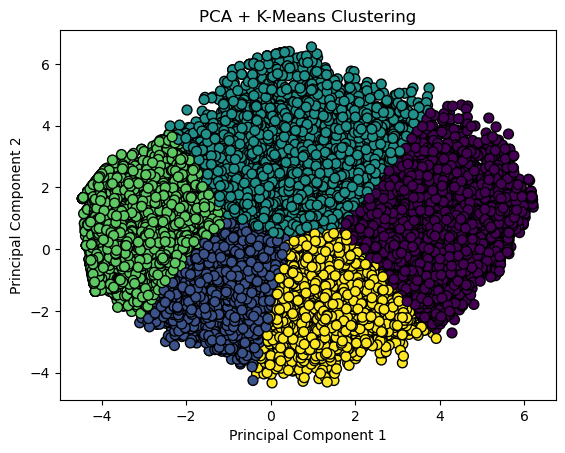

In [123]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# data = data.dropna(subset=['elevation_p', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc', 'stop_count', 'average_speed', 'max_speed', 'speed_variation'])

# Select the features for clustering
X = smoothed_data[['bin_elevation_p', 'bin_elevation_n', 'bin_ele_X_speed_acc_p', 'bin_ele_X_speed_acc_n', 'bin_average_acceleration', 'bin_average_deacceleration', 'bin_std_acc_dacc', 'bin_stop_count', 'bin_average_speed', 'bin_max_speed', 'bin_speed_variation']]




# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Perform K-Means clustering
k = 5  # You can choose the number of clusters (k) as needed
kmeans = KMeans(n_init=10,n_clusters=k, random_state=0)
smoothed_data['cluster'] = kmeans.fit_predict(principal_components)

# Fit K-Means on the principal components
principal_df['cluster'] = kmeans.fit_predict(principal_components)

smoothed_data['PC1'] = principal_df['PC1']
smoothed_data['PC2'] = principal_df['PC2']

# Plot the clusters in the reduced space
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['cluster'], cmap='viridis', marker='o', s=50, edgecolors='k')
plt.title('PCA + K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [121]:
smoothed_data.to_csv('kmeans_bin_clusters.csv', index=False)

Only K means

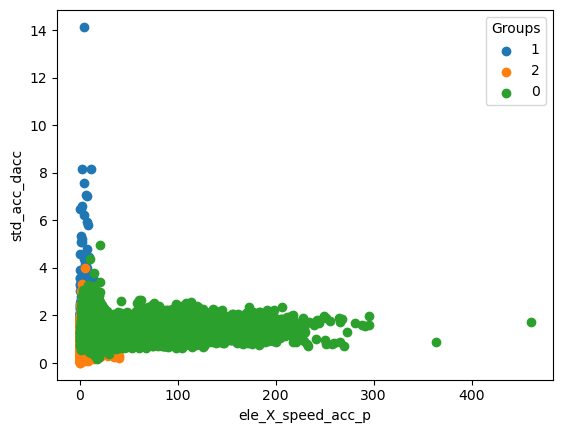

In [108]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Select the features for clustering
X = smoothed_data[['bin_elevation_p', 'bin_elevation_n', 'bin_ele_X_speed_acc_p', 'bin_ele_X_speed_acc_n', 'bin_average_acceleration', 'bin_average_deacceleration', 'bin_std_acc_dacc', 'bin_stop_count', 'bin_average_speed', 'bin_max_speed', 'bin_speed_variation']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = X

# Perform K-Means clustering
k = 3  # You can choose the number of clusters (k) as needed
kmeans = KMeans(n_init=10,n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Add 'deviceid' back to the clustered data
# clustered_data = pd.merge(df_all, result[['deviceid', 'cluster']], on='deviceid')

# Create a scatter plot with annotations
groups = data['cluster'].unique()

for group in groups:
    group_data = data[data['cluster'] == group]
    plt.scatter(group_data['ele_X_speed_acc_p'], group_data['std_acc_dacc'], label=group)

# Annotate data points with 'deviceid'
    # for index, row in group_data.iterrows():
    #     plt.annotate(row['deviceid'], (row['ele_X_speed_acc_p'], row['ele_X_speed_acc_n']), fontsize=5)

plt.xlabel('ele_X_speed_acc_p')
plt.ylabel('std_acc_dacc')
plt.legend(title='Groups')

# Show the plot
plt.show()

Testing

In [49]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'column_to_smooth' is the column you want to smooth
# You can adjust the number of bins based on your specific needs

# Create a DataFrame (replace this with your actual data)
data = {'column_to_smooth': [40, 55,15, 60, 70,10,  22, 35, ]}
df = pd.DataFrame(data)

# Specify the number of bins
num_bins = round(len(df['column_to_smooth'])/5)

# Dynamically calculate bin edges based on quantiles
bin_edges = pd.qcut(df['column_to_smooth'], q=num_bins, retbins=True)[1]
bin_edges[0] = bin_edges[0]-1
print(bin_edges)
# Create bin labels
bin_labels = [f'Bin {i}' for i in range(1, num_bins + 1)]

# Use cut to bin the data
df['bin_column'] = pd.cut(df['column_to_smooth'], bins=bin_edges, labels=bin_labels)

# Calculate bin means
bin_means = df.groupby('bin_column')['column_to_smooth'].mean()

# Replace values with bin means
df['smoothed_column'] = df['bin_column'].map(bin_means)

# Display the resulting DataFrame
print(df)


[ 9.  37.5 70. ]
   column_to_smooth bin_column smoothed_column
0                40      Bin 2           56.25
1                55      Bin 2           56.25
2                15      Bin 1           20.50
3                60      Bin 2           56.25
4                70      Bin 2           56.25
5                10      Bin 1           20.50
6                22      Bin 1           20.50
7                35      Bin 1           20.50


In [50]:
l =["a"]
print(l[0])

a
